In [2]:
# https://stats.stackexchange.com/questions/340175/why-is-t-sne-not-used-as-a-dimensionality-reduction-technique-for-clustering-or
# http://www.cs.colorado.edu/~mozer/Teaching/syllabi/6622/papers/Platt1999.pdf
# https://github.com/DmitryUlyanov/Multicore-TSNE

In [3]:
import h5py
import numpy as np
import pandas as pd
from pathlib import Path
from pprint import pprint 

In [4]:
with h5py.File('../data/usps.h5', 'r') as hf:
    train = hf.get('train')
    X_train = train.get('data')[:]
    y_train = train.get('target')[:]
    test = hf.get('test')
    X_test = test.get('data')[:]
    y_test = test.get('target')[:]
    
X_train.shape, y_train.shape

((7291, 256), (7291,))

In [5]:
df = pd.DataFrame(data=X_train)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.1845,0.9310,0.4165,...,0.6520,0.9115,1.0000,0.7410,0.2630,0.0045,0.0000,0.0000,0.000,0.0
1,0.0,0.0,0.0,0.0935,0.1645,0.0955,0.0565,0.1645,0.0735,0.0000,...,0.1645,0.1645,0.4835,0.8805,0.8810,0.5630,0.4525,0.1645,0.086,0.0
2,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0020,...,0.0000,0.0000,0.0000,0.4455,1.0000,0.4105,0.0000,0.0000,0.000,0.0
3,0.0,0.0,0.0,0.0000,0.0000,0.3635,0.8420,0.9800,0.7250,0.4665,...,0.3410,1.0000,0.7680,0.0065,0.0000,0.0000,0.0000,0.0000,0.000,0.0
4,0.0,0.0,0.0,0.0000,0.0000,0.0360,0.3980,0.8755,0.7330,0.6170,...,0.7330,0.8195,1.0000,1.0000,0.8955,0.7195,0.4005,0.0585,0.000,0.0


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
count,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.00000,7291.000000,...,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000
mean,0.001791,0.009431,0.024424,0.056131,0.113266,0.194849,0.315504,0.477115,0.47368,0.357718,...,0.400727,0.569911,0.558219,0.342946,0.173145,0.081071,0.038903,0.021304,0.010355,0.002661
std,0.025856,0.075601,0.122132,0.180258,0.251330,0.314355,0.358016,0.384152,0.37649,0.373419,...,0.386447,0.376492,0.378668,0.362929,0.291277,0.207323,0.150415,0.114350,0.079499,0.033028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.02500,0.000000,...,0.000000,0.169250,0.131000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140500,0.530500,0.50100,0.219500,...,0.323500,0.684000,0.668000,0.210500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.019000,0.304500,0.627250,0.848000,0.83725,0.719000,...,0.777000,0.917500,0.907500,0.673000,0.247750,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.819000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.796000


In [7]:
(df.min().values + np.random.rand(1, 256) * (df.max().values - df.min().values)).shape

(1, 256)

In [8]:
np.random.rand(1, 5)

array([[0.09095624, 0.85335228, 0.19443776, 0.13706935, 0.60882721]])

In [9]:
from sklearn import svm

In [10]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [11]:
clf = svm.OneClassSVM(nu=0.2, kernel="rbf", gamma='auto')
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.2, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [12]:
a = np.zeros((2, 5))
a[0, :] = np.ones((1, 5))
a

array([[1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.]])

In [14]:
num_neg_samples = X_train.shape[0] * 3
# num_neg_samples = 500
neg_samples = np.zeros((num_neg_samples, X_train.shape[1]))
datamin = df.min().values
datamax = df.max().values

for i in range(num_neg_samples):
    while True:
        # Generate sample
        sample = datamin + np.random.rand(1, 256) * (datamax - datamin)

        if clf.predict(sample) == -1:
            neg_samples[i, :] = sample
            break
    
pprint(neg_samples.shape)

(21873, 256)


In [15]:
neg_X_train = np.append(X_train, neg_samples, axis=0)

In [16]:
neg_X_train.shape

(29164, 256)

In [17]:
y_train.shape

(7291,)

In [18]:
neg_y_train = np.append(y_train, np.zeros(X_train.shape[0] * 3) + 10, axis=0)

In [19]:
neg_y_train.shape

(29164,)

In [20]:
unique, counts = np.unique(neg_y_train, return_counts=True)
dict(zip(unique, counts))

{0.0: 1194,
 1.0: 1005,
 2.0: 731,
 3.0: 658,
 4.0: 652,
 5.0: 556,
 6.0: 664,
 7.0: 645,
 8.0: 542,
 9.0: 644,
 10.0: 21873}

In [47]:
from sklearn.model_selection import cross_val_score
clf_svm = svm.SVC(gamma='auto')
scores = cross_val_score(clf_svm, neg_X_train, neg_y_train, cv=7)

In [48]:
print(scores.mean(), scores.std())

0.9888561598069694 0.00108685076383816


In [49]:
clf_svm = svm.SVC(gamma='auto')
clf_svm.fit(neg_X_train, neg_y_train)
clf_svm.score(X_test, y_test)

0.9277528649725959

In [50]:
clf_svm = svm.SVC(gamma='auto')
scores = cross_val_score(clf_svm, X_train, y_train, cv=7)

In [51]:
print(scores.mean(), scores.std())

0.9554251209533143 0.004337592371196017


In [52]:
clf_svm2 = svm.SVC(gamma='auto')
clf_svm2.fit(X_train, y_train)
clf_svm2.score(X_test, y_test)

0.9277528649725959

# Visualize

In [21]:
X = neg_X_train
y = neg_y_train

In [22]:
%load_ext wurlitzer

In [25]:
from MulticoreTSNE import MulticoreTSNE as TSNE
embeddings_fast = TSNE(n_jobs=8, verbose=2).fit_transform(X)

Performing t-SNE using 8 cores.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 2916 of 29164
 - point 5832 of 29164
 - point 8748 of 29164
 - point 11664 of 29164
 - point 14580 of 29164
 - point 17496 of 29164
 - point 20412 of 29164
 - point 23328 of 29164
 - point 26244 of 29164
 - point 29160 of 29164
Done in 86.00 seconds (sparsity = 0.004650)!
Learning embedding...
Iteration 51: error is 108.745197 (50 iterations in 10.00 seconds)
Iteration 101: error is 104.679512 (50 iterations in 12.00 seconds)
Iteration 151: error is 103.850988 (50 iterations in 12.00 seconds)
Iteration 201: error is 103.567300 (50 iterations in 15.00 seconds)
Iteration 251: error is 103.447066 (50 iterations in 14.00 seconds)
Iteration 301: error is 5.736957 (50 iterations in 11.00 seconds)
Iteration 351: error is 5.586588 (50 iterations in 10.00 seconds)
Iteration 401: error is 5.486267 (50 iterations in 10.00 seconds)
Iteration 451:

In [29]:
from MulticoreTSNE import MulticoreTSNE as TSNE
train_fast = TSNE(n_jobs=8, verbose=2).fit_transform(X_train)

Performing t-SNE using 8 cores.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 730 of 7291
 - point 1458 of 7291
 - point 2187 of 7291
 - point 2916 of 7291
 - point 3645 of 7291
 - point 4374 of 7291
 - point 5103 of 7291
 - point 5832 of 7291
 - point 6561 of 7291
 - point 7290 of 7291
Done in 3.00 seconds (sparsity = 0.017651)!
Learning embedding...
Iteration 51: error is 87.728705 (50 iterations in 1.00 seconds)
Iteration 101: error is 80.453048 (50 iterations in 2.00 seconds)
Iteration 151: error is 79.806915 (50 iterations in 2.00 seconds)
Iteration 201: error is 79.622929 (50 iterations in 1.00 seconds)
Iteration 251: error is 79.570556 (50 iterations in 2.00 seconds)
Iteration 301: error is 2.710029 (50 iterations in 1.00 seconds)
Iteration 351: error is 2.319104 (50 iterations in 2.00 seconds)
Iteration 401: error is 2.123713 (50 iterations in 2.00 seconds)
Iteration 451: error is 1.995160 (50 iteration

In [26]:
X_2d = embeddings_fast
data = np.concatenate((X_2d, y.reshape(y.shape[0], 1)), axis=1)
viz_df = pd.DataFrame(data=data, columns=['x', 'y', 'class'])

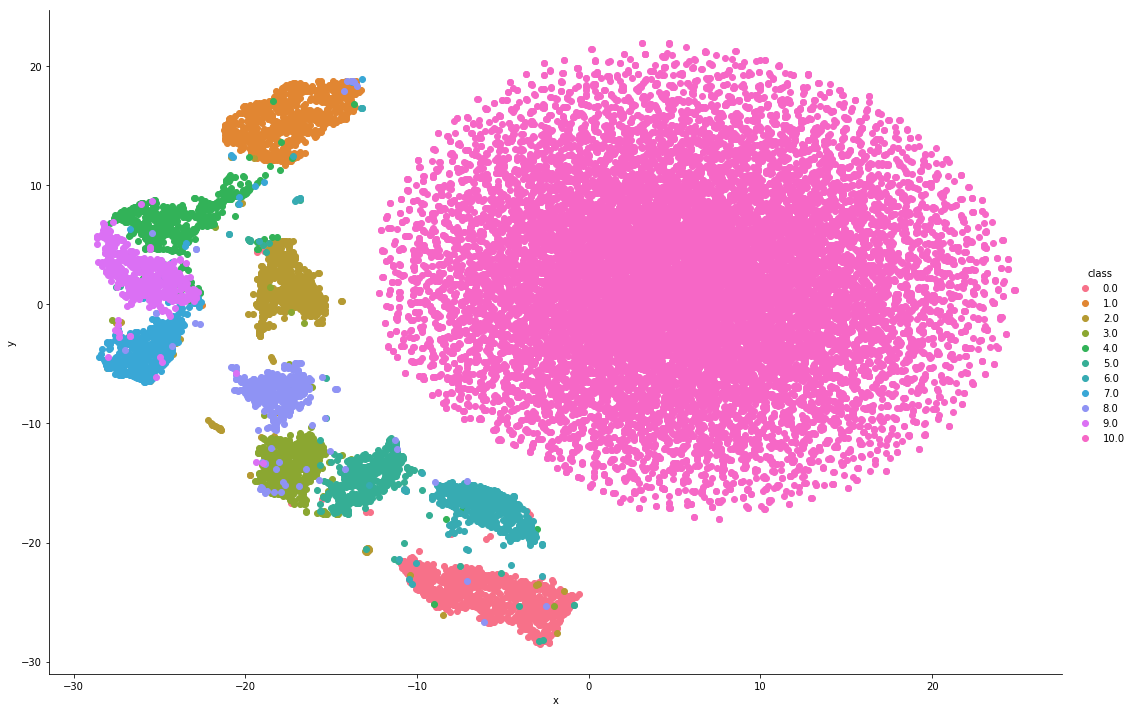

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
fg = sns.FacetGrid(data=viz_df, hue='class', hue_order=np.unique(y), aspect=1.5, height=10)
fg.map(plt.scatter, 'x', 'y').add_legend()

In [ ]:
# TODO: GAIT - NEGATIVE OTHER USERS